# Setting up


In [0]:
# mount the drive
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# import libraries
import pandas as pd
import folium
from folium.plugins import HeatMap
import os



In [0]:
path = '/content/gdrive/My Drive/MP_Parking_Site/Data Finding/Vicroad_source_data/'
path_data = '/content/gdrive/My Drive/Viz_Project/data/'
output = '/content/gdrive/My Drive/Viz_Project/results'

# use MP traffic crash data as sampple data
sample_df = pd.read_csv(path+'Crashes_Last_Five_Years.csv')
sample_df.head()

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,RUN_OFFROAD,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,145.003865,-37.894103,3402744,T20130015887,ABS to receive accident,Finished,1/8/2013,16.15.00,No,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,Day,Yes,T intersection,Other injury accident,80 km/hr,No,54909,145.00387,-37.89410,Intersection,GLEN EIRA,METROPOLITAN SOUTH EAST REGION,2500339.989,2400778.106,5,1,0,0,1,4,3,2,0,1,4,0,0,0,0,0,0,0,0,1,No,0,4,0,4,0,0,MELB_URBAN,MELB_URBAN,"GLEN EIRA,BAYSIDE",METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,"Arterial Highway,Local Road",Divided,"Div,Undiv",Metro
1,145.360983,-37.755923,3402745,T20130015889,ABS to receive accident,Finished,1/8/2013,17.50.00,No,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,Dark Street lights on,Yes,Not at intersection,Other injury accident,80 km/hr,No,262418,145.36098,-37.75592,Non-Intersection,YARRA RANGES,METROPOLITAN SOUTH EAST REGION,2531808.684,2416054.063,3,1,0,0,1,2,1,2,0,0,3,0,0,0,0,0,0,0,0,0,No,0,3,0,3,0,0,MELB_URBAN,MELB_URBAN,YARRA RANGES,METROPOLITAN SOUTH EAST REGION,B,B,Arterial Highway,Arterial Highway,Divided,Div,Metro
2,144.973222,-37.807724,3402746,T20130015892,ABS to receive accident,Finished,1/8/2013,18.14.00,Yes,Collision with vehicle,Thursday,VEHICLE OFF FOOTPATH STRIKES VEH ON CARRIAGEWAY,No,Dark Street lights on,Yes,Cross intersection,Serious injury accident,50 km/hr,No,222039,144.97322,-37.80772,Intersection,YARRA,METROPOLITAN NORTH WEST REGION,2497642.009,2410364.904,2,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,No,0,2,0,1,0,0,MELB_URBAN,MELB_URBAN,"YARRA,MELBOURNE",METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Divided,"Div,Undiv",Metro
3,145.026719,-37.770118,3402747,T20130015893,ABS to receive accident,Finished,1/8/2013,18.15.00,Yes,Collision with vehicle,Thursday,RIGHT THROUGH,No,Dark Street lights on,Yes,Cross intersection,Other injury accident,60 km/hr,No,38086,145.02672,-37.77012,Intersection,DAREBIN,METROPOLITAN NORTH WEST REGION,2502353.962,2414538.590,2,1,0,0,1,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,No,0,2,0,1,1,0,MELB_URBAN,MELB_URBAN,DAREBIN,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undiv,Metro
4,145.055800,-37.679149,3402748,T20130015894,ABS to receive accident,Finished,1/8/2013,16.30.00,No,Collision with a fixed object,Thursday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,Day,Yes,Not at intersection,Other injury accident,50 km/hr,Yes,262419,145.05580,-37.67915,Non-Intersection,WHITTLESEA,METROPOLITAN NORTH WEST REGION,2504921.915,2424633.538,2,1,0,0,1,1,2,0,0,0,2,0,0,0,0,0,0,0,0,1,No,0,2,0,2,0,0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro


In [0]:
print(sample_df['TOTAL_PERSONS'].max(), sample_df['TOTAL_PERSONS'].min())
print(sample_df['TOTAL_PERSONS'].unique())

97 1
[ 5  3  2  1  4  7  8  6 10  9 19 16 11 97 13 12 21 27 17 14 15 37 50 23
 40 29 22 18 48 89 20 24 35 33 38 54]


In [0]:
dfBaySensors = pd.read_csv(
    '/content/gdrive/My Drive/Carpark_research/data/' + "On-street_Parking_Bay_Sensors.csv"
)
dfBaySensors.head()

,bay_id,st_marker_id,status,location,lat,lon
0,1315,1315W,Unoccupied,"(-37.81707601430344, 144.95873044431505)",-37.817076,144.958730
1,1263,4455W,Unoccupied,"(-37.814009141193395, 144.9545079009563)",-37.814009,144.954508
2,6049,13020N,Unoccupied,"(-37.82108042002886, 144.94689159807888)",-37.821080,144.946892
3,1147,C1226,Present,"(-37.81229665650585, 144.95946258262433)",-37.812297,144.959463
4,6101,C13500,Present,"(-37.819219255631985, 144.9459328911147)",-37.819219,144.945933


In [0]:
def df_to_list(path_df, col_latitude, col_longitude):
  """
  A convient function to transform dataframe of locations into list of lists for the path map;
  path_df: a dataframe contains the locations
  col_latitude: column name of latitude
  col_longitude: column name of longitude
  """
   
  location_list =[] 
  # iterate over the rows
  for _, rows in path_df[[col_latitude, col_longitude]].iterrows(): 
    temp_list =[rows[col_latitude], rows[col_longitude]] 
      
    # append the list to the final list 
    location_list.append(temp_list) 
  return location_list
  


In [0]:
park_location = df_to_list(dfBaySensors, 'lat', 'lon')

In [0]:
park_location[:5]

[[-37.81707601430344, 144.95873044431502],
 [-37.8140091411934, 144.95450790095632],
 [-37.821080420028856, 144.94689159807888],
 [-37.81229665650585, 144.95946258262433],
 [-37.81921925563199, 144.9459328911147]]

# Heatmap

### Documentation of parameters in HeatMap()
* data (list of points of the form [lat, lng] or [lat, lng, weight]) 
 – The points you want to plot. You can also provide a numpy.array of shape (n,2) or (n,3).

* name (string, default None) – The name of the Layer, as it will appear in LayerControls.

* min_opacity (default 1.) – The minimum opacity the heat will start at.

* max_zoom (default 18) – Zoom level where the points reach maximum intensity 
 (as intensity scales with zoom), equals maxZoom of the map by default

* max_val (float, default 1.) – Maximum point intensity

* radius (int, default 25) – Radius of each “point” of the heatmap

* blur (int, default 15) – Amount of blur

* gradient (dict, default None) – Color gradient config. e.g. {0.4: ‘blue’, 0.65: ‘lime’, 1: ‘red’}

* overlay (bool, default True) – Adds the layer as an optional overlay (True) or the base layer (False).

* control (bool, default True) – Whether the Layer will be included in LayerControls.

* show (bool, default True) – Whether the layer will be shown on opening (only for overlays).


In [0]:
# the library for the legend
import branca.colormap as bcm 

# create self-defined colour map
steps = 20
color_map = bcm.linear.Spectral_11.scale(0, 1).to_step(steps)

gradient_map={}
for i in range(steps):
    gradient_map[1/steps*i] = color_map.rgb_hex_str(1/steps*i)

In [0]:
# create a nested list for heatmap raw data storage: numpy.array of shape(n,3)
heat_list = [[row['Y'],row['X'],row['TOTAL_PERSONS']] for index, row in sample_df[(sample_df['LGA_NAME_ALL'].str.contains("MORNINGTON"))].iterrows()]

# create a base map for heatmap
# The default tiles are set to OpenStreetMap, but Stamen Terrain, Stamen Toner, cartodbpositron, Mapbox Bright, and Mapbox Control Room, and many others are built in
base_heat_map= folium.Map(location=[-38.3002,145.0827],tiles='cartodbpositron',zoom_start=11)

# create the heatmap
HeatMap(heat_list, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=15, blur=15, gradient=gradient_map, overlay=True, control=True, show=True).add_to(base_heat_map)

base_heat_map.add_child(color_map)
# save the map to html.files
base_heat_map.save('heatmap.html')

base_heat_map

In [0]:


# create a base map for heatmap
# The default tiles are set to OpenStreetMap, but Stamen Terrain, Stamen Toner, cartodbpositron, Mapbox Bright, and Mapbox Control Room, and many others are built in
base_heat_map= folium.Map(location=[-37.8210, 144.94689],tiles='cartodbpositron',zoom_start=14)

# create the heatmap
HeatMap(park_location, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=15, blur=15, gradient=gradient_map, overlay=True, control=True, show=True).add_to(base_heat_map)

base_heat_map.add_child(color_map)
# save the map to html.files
base_heat_map.save('heatmap.html')

base_heat_map

### Helper functions


## Path map
To show a polyline in the map with a provided **list** of location **[latitude, longitude]**.<br>
Parameters:<br>
* weight: the width of the line
* color: the color of the line
* opacity
* popup=None
* tooltip=None

In [0]:
from folium import plugins
mp_list = df_to_list(sample_df[:20], 'Y', 'X')

park_path_map = folium.Map(location=[-37.8210, 144.94689],tiles='cartodbpositron',zoom_start=14) #  -38.3002,145.0827
# def ployline_map(location_list, )


folium.PolyLine(sorted(park_location[:5]), weight=5, color='red', popup=None, tooltip=None, opacity=0.4).add_to(park_path_map)
folium.PolyLine(park_location[:50], weight=2, color='green', popup=None, tooltip=None, opacity=0.8).add_to(park_path_map)
folium.PolyLine(sorted(park_location[10:16]), weight=5, color='blue', popup=None, tooltip=None, opacity=0.4).add_to(park_path_map)

# icon: 'ok-sign', 'remove-sign' 
folium.Marker(
    location=park_location[0],
    popup='Add popup text here.',
    icon=folium.Icon(color='green', icon=None),
).add_to(park_path_map)

folium.Marker(
    location=park_location[1],
    popup='Add popup text here.',
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(park_path_map)

park_path_map

In [0]:
from folium import plugins
mp_list = df_to_list(sample_df[:20], 'Y', 'X')

base_path_map = folium.Map(location=[-38.3002,145.0827],tiles='cartodbpositron',zoom_start=11) #  -38.3002,145.0827
# def ployline_map(location_list, )


folium.PolyLine(sorted(heat_list[:5]), weight=5, color='red', popup=None, tooltip=None, opacity=0.4).add_to(base_path_map)

folium.PolyLine(sorted(heat_list[10:16]), weight=5, color='blue', popup=None, tooltip=None, opacity=0.4).add_to(base_path_map)

# icon: 'ok-sign', 'remove-sign' 
folium.Marker(
    location=heat_list[0],
    popup='Add popup text here.',
    icon=folium.Icon(color='green', icon=None),
).add_to(base_path_map)

folium.Marker(
    location=heat_list[1],
    popup='Add popup text here.',
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(base_path_map)
# folium.Marker(
#     location=[-37.81379749, 144.96995745],
#     popup='Add popup text here.',
#     icon=folium.Icon(color='green', icon='ok-sign'),
# ).add_to(m)

# # to add the legend
# template = """
# {% macro html(this, kwargs) %}

# <!doctype html>
# <html lang="en">
# <head>
#   <meta charset="utf-8">
#   <meta name="viewport" content="width=device-width, initial-scale=1">
#   <title>jQuery UI Draggable - Default functionality</title>
#   <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

#   <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
#   <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
#   <script>
#   $( function() {
#     $( "#maplegend" ).draggable({
#                     start: function (event, ui) {
#                         $(this).css({
#                             right: "auto",
#                             top: "auto",
#                             bottom: "auto"
#                         });
#                     }
#                 });
# });

#   </script>
# </head>
# <body>

 
# <div id='maplegend' class='maplegend' 
#     style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
#      border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

 
# <div class='legend-title'>Legend (draggable!)</div>
# <div class='legend-scale'>
#   <ul class='legend-labels'>
#     <li><span style='background:red;opacity:0.4;'></span>red line</li>
#     <li><span style='background:blue;opacity:0.4;'></span>blue line</li>
   

#   </ul>
# </div>
# </div>
 
# </body>
# </html>

# <style type='text/css'>
#   .maplegend .legend-title {
#     text-align: left;
#     margin-bottom: 5px;
#     font-weight: bold;
#     font-size: 90%;
#     }
#   .maplegend .legend-scale ul {
#     margin: 0;
#     margin-bottom: 5px;
#     padding: 0;
#     float: left;
#     list-style: none;
#     }
#   .maplegend .legend-scale ul li {
#     font-size: 80%;
#     list-style: none;
#     margin-left: 0;
#     line-height: 18px;
#     margin-bottom: 2px;
#     }
#   .maplegend ul.legend-labels li span {
#     display: block;
#     float: left;
#     height: 16px;
#     width: 30px;
#     margin-right: 5px;
#     margin-left: 0;
#     border: 1px solid #999;
#     }
#   .maplegend .legend-source {
#     font-size: 80%;
#     color: #777;
#     clear: both;
#     }
#   .maplegend a {
#     color: #777;
#     }
# </style>
# {% endmacro %}"""

# # add the legend
# macro = MacroElement()
# macro._template = Template(template)

# base_path_map.get_root().add_child(macro)

# base_heat_map.save(output+'path_map_with_marker.html')

base_path_map

In [0]:
# to add the legend
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

 
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.4;'></span>red line</li>
    <li><span style='background:blue;opacity:0.4;'></span>blue line</li>
   

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

# add the legend
macro = MacroElement()
macro._template = Template(template)

base_path_map.get_root().add_child(macro)

base_heat_map.save(output+'path_map_with_marker.html')

base_path_map

NameError: ignored

## Choropleth maps

In [0]:
import branca
import json
import requests

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[' '])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index('FIPS_Code')['Employed_2011']


def style_function(feature):
    employed = employed_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)


m

In [0]:
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join(path_data, 'us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
#state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')

state_data = pd.read_csv(path_data+'US_Unemployment_Oct2012.csv')
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)

m 
# Save to html
#m.save('#292_folium_chloropleth_USA1.html')


/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Choropleth map with Geopandas

In [0]:
!pip install geopandas


     |████████████████████████████████| 921kB 4.8MB/s 
     |████████████████████████████████| 11.9MB 21.3MB/s 
     |████████████████████████████████| 10.1MB 22.1MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=7fbf9c99be8a7b782786afb9cf38f21cc21fd2310f79b2e790672213cdd13734
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


<Figure size 1600x1200 with 0 Axes>

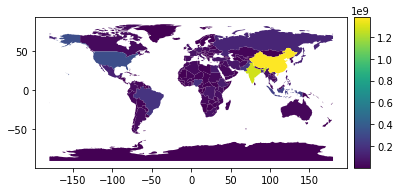

In [0]:
import geopandas
import matplotlib as plt
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# setting plot size
plt.figure(figsize=(16,12), dpi= 100)

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)